<a href="https://colab.research.google.com/github/alexkardan/ABS-Visualizations/blob/main/ABS_Low_Volume_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [4]:
Weekly_Low_Volume_Store = pd.read_csv("Montgomery College Data Set (Low Volume_Weekly).csv", header = 1)

In [5]:
Weekly_Low_Volume_Store.describe()

,ItemID,Bottles Per Case,Cost Amount (Per Bottle),1,2,3,4,5,6,7,...,45,46,47,48,49,50,51,52,53,Grand Total
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,88843.194000,32.318000,10.525284,4.420000,6.246000,6.856000,6.094000,7.542000,7.212000,7.060000,...,7.506000,6.42600,6.850000,8.316000,6.506000,5.808000,7.262000,7.418000,3.990000,424.578000
std,94195.724978,35.886216,13.320609,10.883773,12.677181,16.222503,11.898248,17.588375,15.417212,14.877873,...,14.425747,11.93505,13.333081,16.951544,14.971113,13.635064,16.651965,13.146442,10.355306,622.009163
min,1880.000000,3.000000,0.732667,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
25%,29460.500000,12.000000,1.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000
50%,66084.500000,24.000000,3.247500,0.000000,1.000000,2.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.00000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,1.000000,254.500000
75%,85059.000000,24.000000,13.990000,5.000000,7.000000,7.000000,6.250000,8.000000,8.000000,8.000000,...,8.000000,7.00000,8.000000,8.000000,6.000000,6.000000,8.000000,8.000000,5.000000,460.000000
max,437638.000000,126.000000,79.990000,141.000000,90.000000,156.000000,141.000000,210.000000,189.000000,242.000000,...,129.000000,113.00000,134.000000,221.000000,216.000000,202.000000,281.000000,120.000000,144.000000,7823.000000


In [6]:
Weekly_Low_Volume_Store = Weekly_Low_Volume_Store.loc[:, ~Weekly_Low_Volume_Store.columns.str.contains("^Unamed")]

In [7]:
grand_total_column = Weekly_Low_Volume_Store.iloc[:, -1]

Weekly_Low_Volume_Store = Weekly_Low_Volume_Store.iloc[:, :-1]

new_columns = ["Item ID", "Description", "Bottles Per Case", "Cost Amount (Per Bottle)"]

num_weeks = len(Weekly_Low_Volume_Store.columns) - len(new_columns)
week_columns = [f"Week {i+1}" for i in range(num_weeks)]

final_columns = new_columns+week_columns

Weekly_Low_Volume_Store.columns = final_columns

Weekly_Low_Volume_Store = pd.concat([Weekly_Low_Volume_Store, grand_total_column], axis = 1)

Weekly_Low_Volume_Store.columns = list(Weekly_Low_Volume_Store.columns[:-1]) + ['Grand Total']

print(Weekly_Low_Volume_Store.columns)

Index(['Item ID', 'Description', 'Bottles Per Case',
       'Cost Amount (Per Bottle)', 'Week 1', 'Week 2', 'Week 3', 'Week 4',
       'Week 5', 'Week 6', 'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11',
       'Week 12', 'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17',
       'Week 18', 'Week 19', 'Week 20', 'Week 21', 'Week 22', 'Week 23',
       'Week 24', 'Week 25', 'Week 26', 'Week 27', 'Week 28', 'Week 29',
       'Week 30', 'Week 31', 'Week 32', 'Week 33', 'Week 34', 'Week 35',
       'Week 36', 'Week 37', 'Week 38', 'Week 39', 'Week 40', 'Week 41',
       'Week 42', 'Week 43', 'Week 44', 'Week 45', 'Week 46', 'Week 47',
       'Week 48', 'Week 49', 'Week 50', 'Week 51', 'Week 52', 'Week 53',
       'Grand Total'],
      dtype='object')


In [8]:
quarterly_mapping = {
    'Q1': [f'Week {i}' for i in range (1,13)],
    'Q2': [f'Week {i}' for i in range (14,26)],
    'Q3': [f'Week {i}' for i in range (27,39)],
    'Q4': [f'Week {i}' for i in range (40,53)]
}

week_to_quarter = {week: quarter for quarter, weeks in quarterly_mapping.items() for week in weeks}

week_columns = [f'Week {i}' for i in range (1,53)]

melted_Weekly_Low_Volume_Store = Weekly_Low_Volume_Store.melt(
    id_vars=["Item ID", "Description", "Bottles Per Case", "Cost Amount (Per Bottle)"],
    value_vars= week_columns,
    var_name= "Week",
    value_name= "Quantity"
)

print(melted_Weekly_Low_Volume_Store)

       Item ID                           Description  Bottles Per Case  \
0        70417  FIREBALL CINN WHISKY 50ML/10PK LOOSE               120   
1        96741            CORONA EXTRA 4/6 NR - 12OZ                24   
2        96083                HEINEKEN 4/6 NR - 12OZ                24   
3        98744         STELLA ARTOIS 4/6 NR - 11.2OZ                24   
4       251042        YUKON JACK FIRE LIQUEUR - 50ML               120   
...        ...                                   ...               ...   
25995    73075         EVAN WILLIAMS EGG NOG - 750ML                12   
25996    57584                    MALIBU RUM - 1.75L                 6   
25997   305536              RUFFINO PROSECCO - 750ML                12   
25998    50318             1800 TEQUILA SILVER 750ML                12   
25999    85910              WOODBRIDGE CHARD - 750ML                12   

       Cost Amount (Per Bottle)     Week  Quantity  
0                      1.090000   Week 1       141  
1    

In [9]:
Weekly_Low_Volume_Store.columns

Index(['Item ID', 'Description', 'Bottles Per Case',
       'Cost Amount (Per Bottle)', 'Week 1', 'Week 2', 'Week 3', 'Week 4',
       'Week 5', 'Week 6', 'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11',
       'Week 12', 'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17',
       'Week 18', 'Week 19', 'Week 20', 'Week 21', 'Week 22', 'Week 23',
       'Week 24', 'Week 25', 'Week 26', 'Week 27', 'Week 28', 'Week 29',
       'Week 30', 'Week 31', 'Week 32', 'Week 33', 'Week 34', 'Week 35',
       'Week 36', 'Week 37', 'Week 38', 'Week 39', 'Week 40', 'Week 41',
       'Week 42', 'Week 43', 'Week 44', 'Week 45', 'Week 46', 'Week 47',
       'Week 48', 'Week 49', 'Week 50', 'Week 51', 'Week 52', 'Week 53',
       'Grand Total'],
      dtype='object')

In [10]:
def items(description):
    description = description.upper()

    if any(keyword in description for keyword in [
        'WHISKEY', 'WHISKY', 'JACK DANIELS', 'JAMESON', 'CROWN ROYAL', 'FIREBALL',
        'MAKER\'S MARK', 'WILD TURKEY', 'BULLEIT', 'KNOB CREEK', 'WOODFORD RESERVE',
        'BASIL HAYDEN', 'EVAN WILLIAMS', 'BLACK VELVET', 'SEAGRAMS 7', 'REBEL YELL',
        'BUFFALO TRACE', 'ELIJAH CRAIG', 'GEORGE DICKEL', 'OLD FORESTER', 'RITTENHOUSE',
        'TINCUP', 'HIGH WEST', 'FOUR ROSES', '1792', 'OLD GRAND-DAD', 'LARCENY', 'TEMPLETON',
        'MICHter\'S', 'WELLER', 'WIDOW JANE', 'PENDLETON', 'JEFFERSON\'S', 'HUDSON',
        'WOLF SPIRIT', 'WESTWARD', 'NEW RIFF', 'PEERLESS', 'STRANAHAN\'S'
    ]):
        return 'Whiskey'

    elif any(keyword in description for keyword in [
    'VODKA', 'TITO', 'SMIRNOFF', 'GREY GOOSE', 'ABSOLUT', 'NEW AMSTERDAM', 'CIROC',
    'SKYY', 'STOLI', 'BELVEDERE', 'KETEL ONE', 'SCOTTY\'S', 'SVEDKA', 'UV', 'PEARL',
    'ZUBROWKA', 'LUKSUSOWA', 'REYKA', 'RAIN', 'CHOPIN', 'THREE OLIVES', 'WHEATLEY',
    'RUSSIAN STANDARD', 'BLUE ICE', 'NIKOLAI', '360 VODKA', 'PRAVDA', 'JEWEL OF RUSSIA',
    # Added Gin terms here:
    'GIN', 'BOMBAY', 'TANQUERAY', 'HENDRICK', 'BEEFEATER', 'PLYMOUTH', 'AVIATION',
    'MONKEY 47', 'SEAGRAM\'S', 'NOLET\'S', 'THE BOTANIST', 'EMPRESS', 'BARR HILL',
    'BROKER\'S', 'BULLDOG', 'SIPSMITH', 'DRY GIN', 'LONDON DRY', 'OLD TOM GIN'
]):
      return 'Vodka / Gin'


    elif any(keyword in description for keyword in [
        'TEQUILA', 'PATRON', 'JOSE CUERVO', 'DON JULIO', 'CASAMIGOS', 'EL JIMADOR',
        'HORNITOS', 'ESPOLON', 'TEREMANA', 'MILAGRO', 'CAMARENA', 'AVION',
        'CAZADORES', 'CLASE AZUL', 'FORTALEZA', 'OLMECA', 'TRES GENERACIONES',
        '1800', 'MI CAMPO', 'MONTELOBOS', 'MAESTRO DOBEL', 'DELEON', 'VOLCAN', 'SANTO',
        'HERRADURA', 'TIERRA NOBLE', 'SIETE LEGUAS', 'LOS AZULEJOS', 'DULCE VIDA'
    ]):
        return 'Tequila'

    elif any(keyword in description for keyword in [
        'RUM', 'BACARDI', 'CAPTAIN MORGAN', 'MALIBU', 'CRUZAN', 'MYERS', 'SAILOR JERRY',
        'ZACAPA', 'PUSSER\'S', 'PLANTATION', 'RON DEL BARRILITO', 'MOUNT GAY',
        'HAVANA CLUB', 'PARROT BAY', 'BRUGAL', 'APPLETON', 'FLOR DE CAÑA', 'DON Q',
        'KRAKEN', 'GOSLINGS', 'BOUNTY', 'TEN TO ONE', 'RHUM', 'ST JAMES', 'EL DORADO'
    ]):
        return 'Rum'

    elif any(keyword in description for keyword in [
        'CORONA', 'MODELO', 'HEINEKEN', 'GUINNESS', 'BUDWEISER', 'COORS', 'STELLA',
        'MICHELOB', 'BLUE MOON', 'YUENGLING', 'BUSCH', 'MILLER', 'ANGRY ORCHARD',
        'DOS EQUIS', 'PACIFICO', 'SAM ADAMS', 'SHINER', 'ROLLING ROCK', 'NATTY BOH',
        'PABST', 'FOSTERS', 'RED STRIPE', 'KIRIN', 'ASAHI', 'CARLSBERG', 'BECK\'S',
        'BEER', 'IPA', 'LAGER', 'ALE', 'STOUT', 'PORTER', 'PILSNER', 'DRAFT', 'PALE ALE',
        'KONA', 'LEINENKUGEL', 'VICTORY', 'NEW BELGIUM', 'SIERRA NEVADA', 'FOUNDERS',
        'GOLDEN ROAD', 'VOODOO RANGER', 'TERRAPIN', 'DOGFISH HEAD', 'BALLAST POINT',
        'FAT TIRE', 'BELL\'S', '21ST AMENDMENT', 'BREWDOG', 'CIGAR CITY'
    ]):
        return 'Beer'

    elif any(keyword in description for keyword in [
        'WINE', 'MERLOT', 'CABERNET', 'CHARDONNAY', 'PINOT', 'RIESLING', 'MOSCATO',
        'ZINFANDEL', 'SAUVIGNON', 'ROSE', 'SYRAH', 'MALBEC', 'BOTA BOX', 'BAREFOOT',
        'YELLOWTAIL', 'BLACK BOX', 'WOODBRIDGE', 'APOTHIC', 'MENAGE A TROIS', 'STELLA ROSA',
        'KENDALL JACKSON', 'JOSH CELLARS', 'CUPCAKE', 'LA CREMA', 'MEIOMI', '14 HANDS',
        'DECOY', 'RAVENSWOOD', 'DUCKHORN', 'CHARLES SMITH', 'CAVIT', 'SANTA MARGHERITA',
        'EDNA VALLEY', 'CLOS DU BOIS', 'ROBERT MONDAVI', 'J LOHR', 'LOUIS MARTINI'
    ]):
        return 'Wine'

    elif any(keyword in description for keyword in [
        'CHAMPAGNE', 'PROSECCO', 'SPARKLING', 'BRUT', 'MOET', 'VEUVE', 'BAREFOOT BUBBLY',
        'MUMM', 'LA MARCA', 'ROEDERER', 'TOTT\'S', 'CHANDON', 'ANDRE', 'DOM PERIGNON',
        'FREIXENET', 'KORBEL', 'COOK\'S', 'BELLAFINA', 'POMMERY', 'BOIZEL', 'PIPER HEIDSIECK'
    ]):
        return 'Sparkling Wine'

    elif any(keyword in description for keyword in [
        'LIQUEUR', 'BAILEYS', 'KAHLUA', 'AMARETTO', 'GRAND MARNIER', 'SOUTHERN COMFORT',
        'SCHNAPPS', 'RUMCHATA', 'FRANGELICO', 'SAMBUCA', 'JAGERMEISTER', 'DRAMBUIE',
        'MIDORI', 'GALLIANO', 'TUACA', 'GODIVA', 'CHAMBORD', 'COINTREAU',
        'CREME DE MENTHE', 'BLUE CURACAO', 'GOLDSCHLAGER', 'TRIPLE SEC', 'PAMA',
        'DISARONNO', 'IRISH CREAM', 'MALIBU BLACK', 'PEACH SCHNAPPS', 'BUTTERSHOTS'
    ]):
        return 'Liqueur'

    elif any(keyword in description for keyword in [
        'BRANDY', 'COGNAC', 'HENNESSY', 'REMY MARTIN', 'COURVOISIER', 'E&J', 'D\'USSE',
        'TORRES', 'HINE', 'CAMUS', 'ST-RÉMY', 'PAUL MASSON', 'MARTELL', 'BARON OTARD',
        'LOUIS XIII', 'VSOP', 'XO', 'GRANDE CHAMPAGNE', 'ARMAGNAC'
    ]):
        return 'Brandy / Cognac'

    elif any(keyword in description for keyword in [
        'SELTZER', 'TRULY', 'WHITE CLAW', 'VIZZY', 'HIGH NOON', 'PRESS', 'BUBLY',
        'BON VIV', 'CANTEEN', 'NÜTRL', 'CANTINA', 'TOPO CHICO', 'SMIRNOFF SELTZER',
        'NATURAL LIGHT SELTZER', 'BUD LIGHT SELTZER', 'RANCH WATER', 'SONIC HARD SELTZER',
        'DEEP EDDY SELTZER', 'POWDER SELTZER', 'CANTEEN VODKA SODA', 'VIVE', 'HAPPY DAD',
        'KONA SELTZER', 'TRULY VODKA', 'FISHER\'S ISLAND', 'OHZA', 'VIVA'
    ]):
        return 'Hard Seltzer'

In [11]:
Weekly_Low_Volume_Store['Description'] = Weekly_Low_Volume_Store['Description'].apply(items)

In [12]:
melted_sales_data = Weekly_Low_Volume_Store.melt(id_vars=['Item ID', 'Description', 'Bottles Per Case'],
                                                    value_vars= week_columns,
                                                    var_name='Week', value_name = 'Quantity Total')
melted_sales_data['Quarter'] = melted_sales_data['Week'].map(week_to_quarter)

<Axes: xlabel='Quarter', ylabel='Quantity Total'>

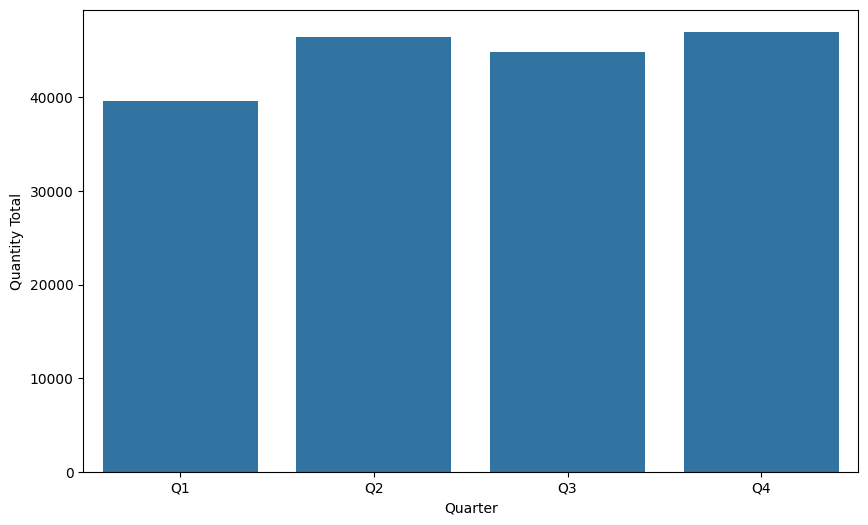

In [13]:
plt.figure(figsize = (10,6))
quarterly_sales = melted_sales_data.groupby(['Description', 'Quarter'])['Quantity Total'].sum().reset_index()
sns.barplot(x = 'Quarter', y = 'Quantity Total', data = melted_sales_data, estimator = sum, errorbar = None)

In [14]:
melted_sales_data[melted_sales_data["Quarter"]=="Q1"]["Description"].value_counts()

,count
Description,
Beer,1020
Vodka / Gin,876
Whiskey,468
Wine,456
Tequila,432
Liqueur,336
Hard Seltzer,240
Rum,216
Brandy / Cognac,180


In [15]:
Weekly_Low_Volume_Store['Description'].value_counts()

,count
Description,
Beer,85
Vodka / Gin,73
Whiskey,39
Wine,38
Tequila,36
Liqueur,28
Hard Seltzer,20
Rum,18
Brandy / Cognac,15


In [16]:
melted_sales_data = melted_sales_data.copy()


In [17]:
melted_sales_data.columns

Index(['Item ID', 'Description', 'Bottles Per Case', 'Week', 'Quantity Total',
       'Quarter'],
      dtype='object')

In [18]:
weekly_totals_low = (
    melted_sales_data
    .groupby(['Week', 'Quarter', 'Description'], as_index=False)
    .agg({'Quantity Total': 'mean', 'Bottles Per Case': 'median'})
)

weekly_stats = (
    weekly_totals_low
    .groupby(['Quarter', 'Description'])[['Quantity Total', 'Bottles Per Case']]
    .agg(['mean', 'std'])
    .reset_index()
)

weekly_stats['Count in top 500'] = weekly_stats['Description'].value_counts()


weekly_stats.columns = [
    f"{col[0]}_{col[1]}" if col[1] else col[0] for col in weekly_stats.columns
]

weekly_stats['Lead Time'] = weekly_stats['Description'].apply(lambda x: 14 if x == 'Beer' else 10)
weekly_stats['Daily Avg Sales'] = weekly_stats['Quantity Total_mean'] / 7
safety_multiplier = 2

weekly_stats['Reorder Point'] = (
    (weekly_stats['Daily Avg Sales'] * weekly_stats['Lead Time']) +
    (safety_multiplier * weekly_stats['Quantity Total_mean'])
)

weekly_stats.rename(columns={
    'Quantity Total_mean': 'Weekly Avg',
    'Quantity Total_std': 'Weekly Std Dev',
    'Bottles Per Case_mean': 'median Bottles/Case',
    'Bottles Per Case_std': 'Std Bottles/Case',
    'Description': 'Alcohol Type',
    'Daily Avg Sales': 'Daily Avg'
}, inplace=True)

print(weekly_stats)

   Quarter     Alcohol Type  Weekly Avg  Weekly Std Dev  median Bottles/Case  \
0       Q1             Beer    9.902941        2.054061                 24.0   
1       Q1  Brandy / Cognac    5.427778        0.819193                 12.0   
2       Q1     Hard Seltzer    5.800000        2.588085                 24.0   
3       Q1          Liqueur    4.285714        0.933677                120.0   
4       Q1              Rum    8.569444        2.184802                 24.0   
5       Q1   Sparkling Wine    2.316667        1.453418                 12.0   
6       Q1          Tequila    4.997685        1.119379                 12.0   
7       Q1      Vodka / Gin    9.383562        0.899323                 24.0   
8       Q1          Whiskey    9.373932        1.805809                 12.0   
9       Q1             Wine    2.364035        0.821736                 12.0   
10      Q2             Beer   12.514706        2.455503                 24.0   
11      Q2  Brandy / Cognac    7.716667 

In [19]:
buffer_zone = 2

lead_time = 10
weekly_stats['Lead Time'] = lead_time

weekly_stats['Reorder Threshold'] = weekly_stats['Alcohol Type'].apply(lambda x: 14 if x == 'Beer' else 10)

weekly_stats['Daily Std Dev'] = weekly_stats['Weekly Std Dev'] / (7 ** 0.5)

weekly_stats['Safety Stock'] = buffer_zone * weekly_stats['Daily Std Dev'] * (weekly_stats['Lead Time'] ** 0.5)

weekly_stats['Reorder Point'] = (
    weekly_stats['Daily Avg'] * weekly_stats['Lead Time']
) + weekly_stats['Safety Stock']
print(weekly_stats)

   Quarter     Alcohol Type  Weekly Avg  Weekly Std Dev  median Bottles/Case  \
0       Q1             Beer    9.902941        2.054061                 24.0   
1       Q1  Brandy / Cognac    5.427778        0.819193                 12.0   
2       Q1     Hard Seltzer    5.800000        2.588085                 24.0   
3       Q1          Liqueur    4.285714        0.933677                120.0   
4       Q1              Rum    8.569444        2.184802                 24.0   
5       Q1   Sparkling Wine    2.316667        1.453418                 12.0   
6       Q1          Tequila    4.997685        1.119379                 12.0   
7       Q1      Vodka / Gin    9.383562        0.899323                 24.0   
8       Q1          Whiskey    9.373932        1.805809                 12.0   
9       Q1             Wine    2.364035        0.821736                 12.0   
10      Q2             Beer   12.514706        2.455503                 24.0   
11      Q2  Brandy / Cognac    7.716667 

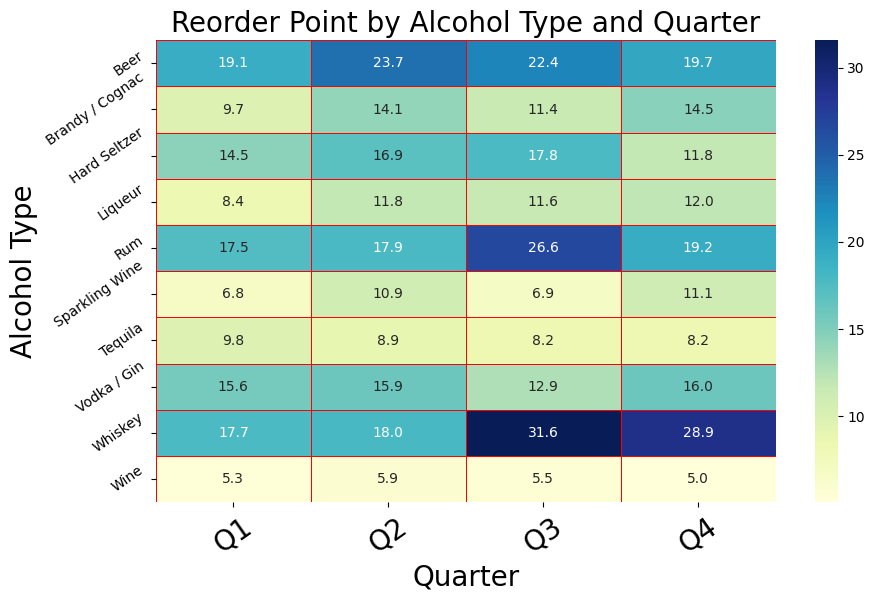

In [20]:
plt.figure(figsize = (10,6))
heatmap_data = weekly_stats.pivot_table(
    index = 'Alcohol Type',
    columns = 'Quarter',
    values = 'Reorder Point'
)

sns.heatmap(heatmap_data, annot = True, cmap = 'YlGnBu', fmt = ".1f", linewidths=.5, linecolor = 'red')

plt.title("Reorder Point by Alcohol Type and Quarter", fontsize=20)
plt.xlabel("Quarter", fontsize=20)
plt.ylabel("Alcohol Type", fontsize=20)
plt.xticks(rotation=35, fontsize=20)
plt.yticks(rotation=35, fontsize=10)
plt.show()

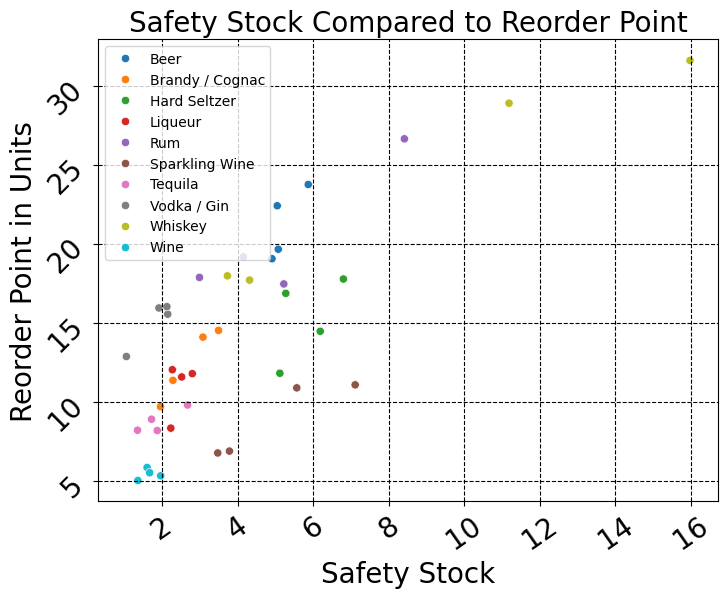

In [21]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = "Safety Stock", y = "Reorder Point", hue = "Alcohol Type", data = weekly_stats)
plt.legend(loc = "upper left", fontsize = 10)
plt.title("Safety Stock Compared to Reorder Point", fontsize = 20)
plt.xlabel("Safety Stock", fontsize = 20)
plt.ylabel("Reorder Point in Units", fontsize = 20)
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks(rotation = 45, fontsize = 20)
plt.grid(linestyle = "--", color = "black")

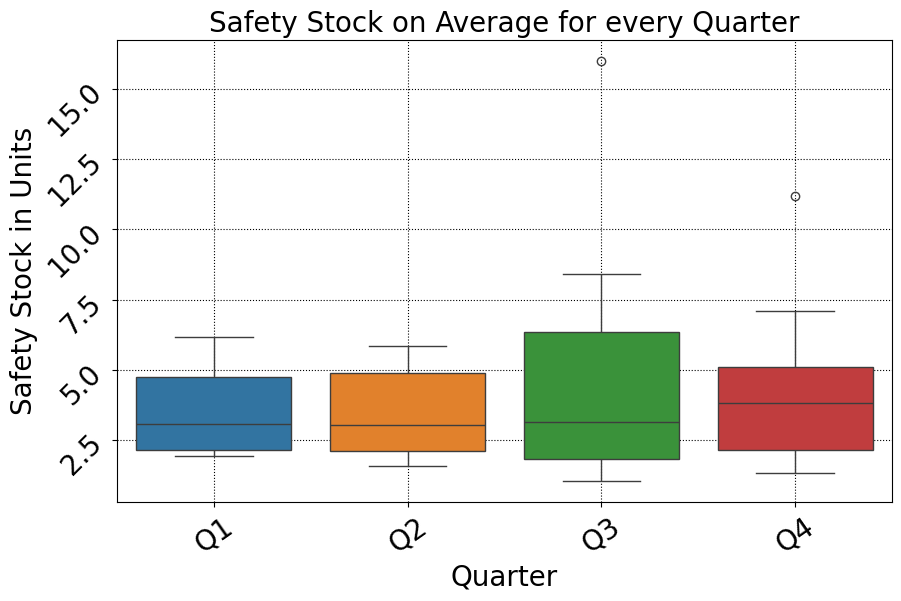

In [22]:
plt.figure(figsize = (10,6))
sns.boxplot(x = "Quarter", y = "Safety Stock", data = weekly_stats, hue = "Quarter")
sns.set_context("poster")
plt.title("Safety Stock on Average for every Quarter", fontsize = 20)
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks(rotation = 45, fontsize = 20)
plt.xlabel("Quarter", fontsize = 20)
plt.ylabel("Safety Stock in Units", fontsize = 20)
plt.grid(linestyle = ":", color = "black")
plt.show()

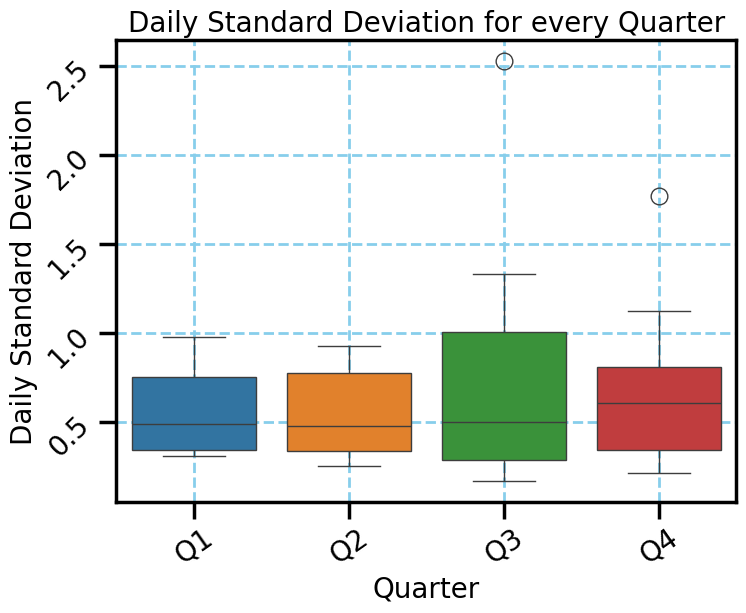

In [23]:
plt.figure(figsize = (8,6))
sns.boxplot(x = "Quarter", y = "Daily Std Dev", hue = "Quarter", data = weekly_stats)
plt.title("Daily Standard Deviation for every Quarter", fontsize = 20)
plt.yticks(rotation = 45, fontsize = 20)
plt.xticks(rotation = 35, fontsize = 20)
plt.xlabel("Quarter", fontsize = 20)
plt.ylabel("Daily Standard Deviation", fontsize = 20)
plt.grid(linestyle = "dashed", color = "skyblue")
plt.show()

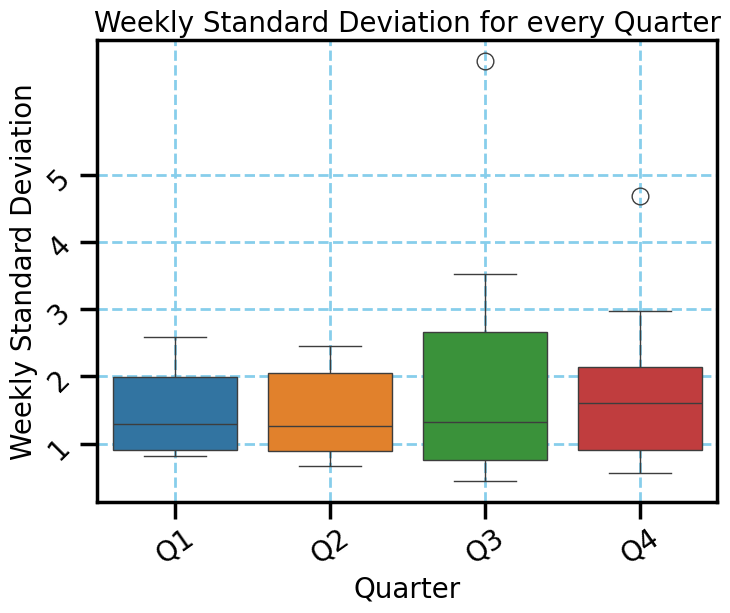

In [24]:
plt.figure(figsize = (8,6))
sns.boxplot(x = "Quarter", y = "Weekly Std Dev", hue = "Quarter", data = weekly_stats)
plt.title("Weekly Standard Deviation for every Quarter", fontsize = 20)
plt.yticks(range(1,6,1),rotation = 45, fontsize = 20)
plt.xticks(rotation = 35, fontsize = 20)
plt.xlabel("Quarter", fontsize = 20)
plt.ylabel("Weekly Standard Deviation", fontsize = 20)
plt.grid(linestyle = "dashed", color = "skyblue")
plt.show()

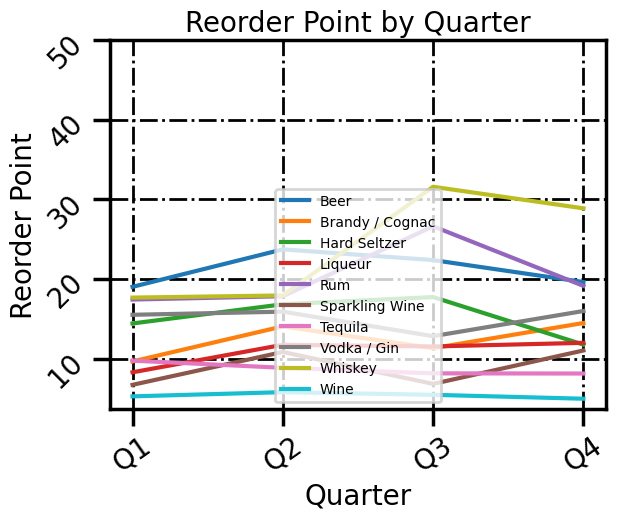

In [25]:
sns.lineplot(x = "Quarter", y = "Reorder Point", hue = "Alcohol Type", data = weekly_stats)

plt.legend(loc = "lower center", fontsize = 10)
plt.title("Reorder Point by Quarter", fontsize = 20)
plt.grid(linestyle = "dashdot", color = "black")
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks(range(10,60,10), rotation = 45, fontsize = 20)
plt.xlabel("Quarter", fontsize = 20)
plt.ylabel("Reorder Point", fontsize = 20)
plt.show()

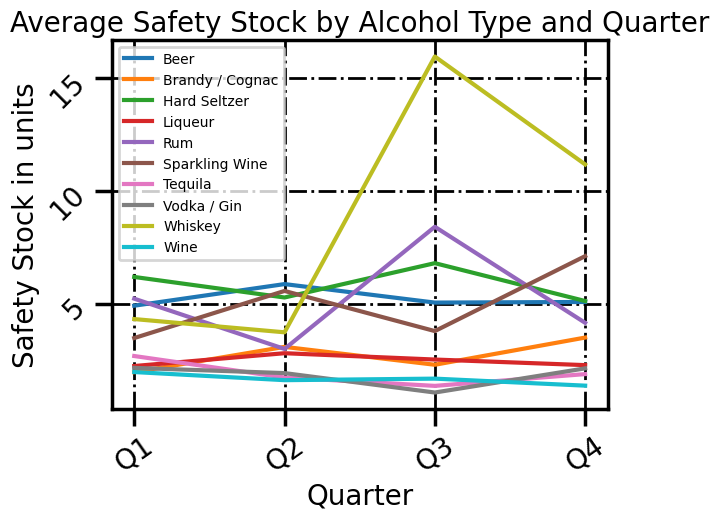

In [26]:
sns.lineplot(x = "Quarter", y = "Safety Stock", hue = "Alcohol Type", data = weekly_stats)

plt.legend(loc = "lower center", fontsize = 10)
plt.title("Average Safety Stock by Alcohol Type and Quarter", fontsize = 20)
plt.grid(linestyle = "dashdot", color = "black")
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks( rotation = 45, fontsize = 20)
plt.xlabel("Quarter", fontsize = 20)
plt.ylabel("Safety Stock in units", fontsize = 20)
plt.legend(loc = "upper left", fontsize = 10)
plt.show()

In [27]:
weekly_stats.columns

Index(['Quarter', 'Alcohol Type', 'Weekly Avg', 'Weekly Std Dev',
       'median Bottles/Case', 'Std Bottles/Case', 'Count in top 500',
       'Lead Time', 'Daily Avg', 'Reorder Point', 'Reorder Threshold',
       'Daily Std Dev', 'Safety Stock'],
      dtype='object')

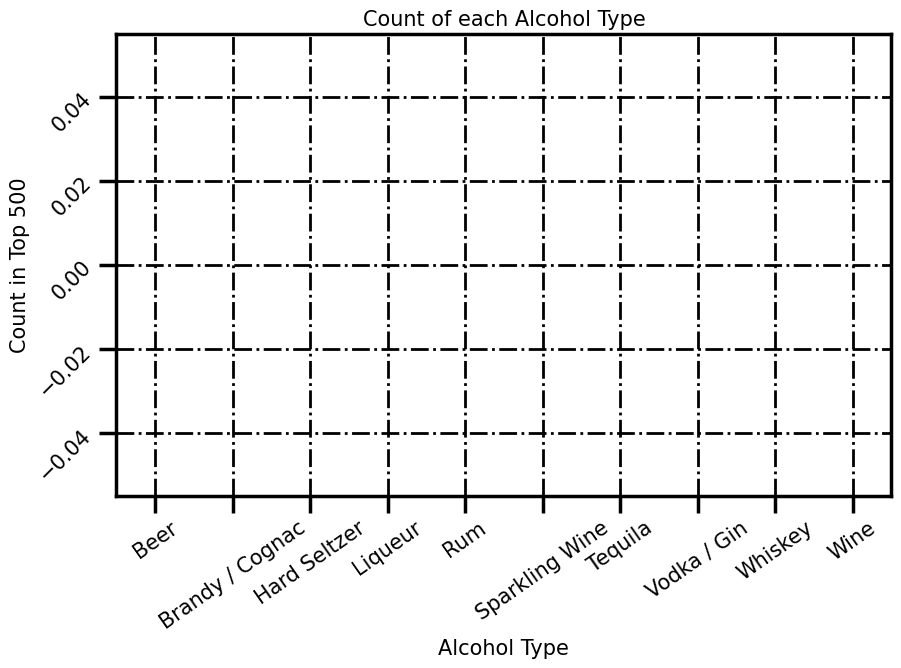

In [28]:
plt.figure(figsize = (10,6))
sns.barplot(x = "Alcohol Type", y = "Count in top 500", hue = "Alcohol Type", data = weekly_stats)
sns.set_context("poster")
plt.title("Count of each Alcohol Type", fontsize = 15)
plt.ylabel("Count in Top 500", fontsize = 15)
plt.xlabel("Alcohol Type", fontsize = 15)
plt.grid(linestyle = "-.", color = "black")
plt.xticks(rotation = 35, fontsize = 15)
plt.yticks( rotation = 45, fontsize = 15)
plt.gca().set_axisbelow(True)
plt.show()

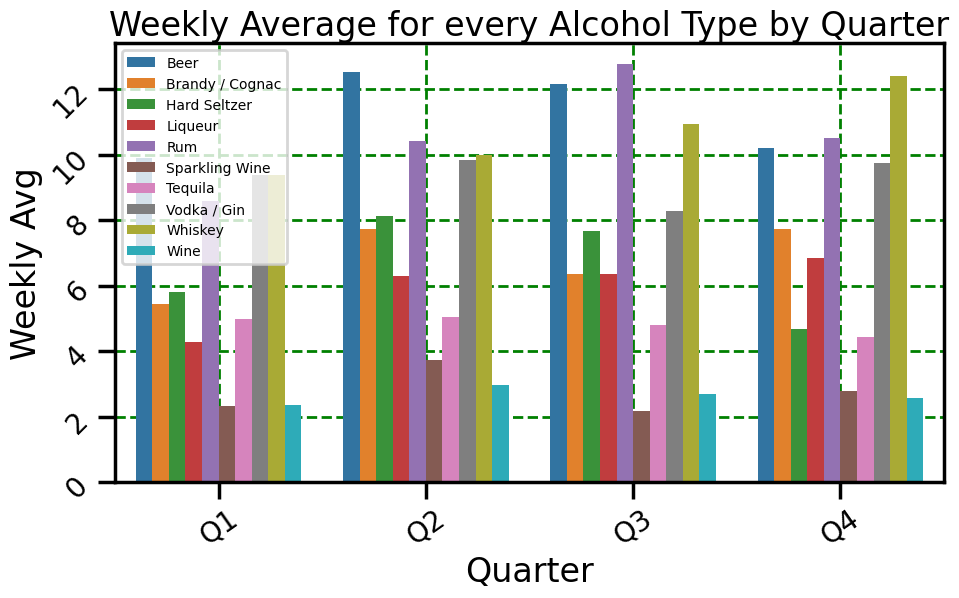

In [29]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Quarter', y = 'Weekly Avg', data = weekly_stats, hue = 'Alcohol Type' )
sns.set_context("poster")
plt.tight_layout()
plt.legend(loc = 'upper left', fontsize = 10)
plt.title("Weekly Average for every Alcohol Type by Quarter")
plt.grid(linestyle = "--", color = "green")
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks( rotation = 45, fontsize = 20)
plt.gca().set_axisbelow(True)
plt.show()

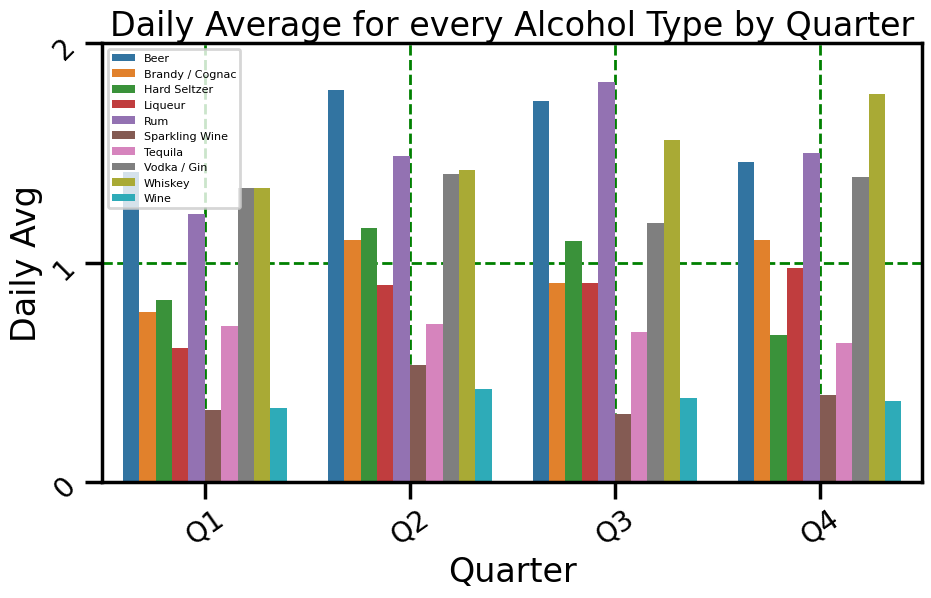

In [30]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Quarter', y = 'Daily Avg', data = weekly_stats, hue = 'Alcohol Type' )
sns.set_context("poster")
plt.tight_layout()
plt.legend(loc = 'upper left', fontsize = 8)
plt.title("Daily Average for every Alcohol Type by Quarter")
plt.grid(linestyle = "--", color = "green")
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks(range(0,3,1), rotation = 45, fontsize = 20)
plt.gca().set_axisbelow(True)
plt.show()

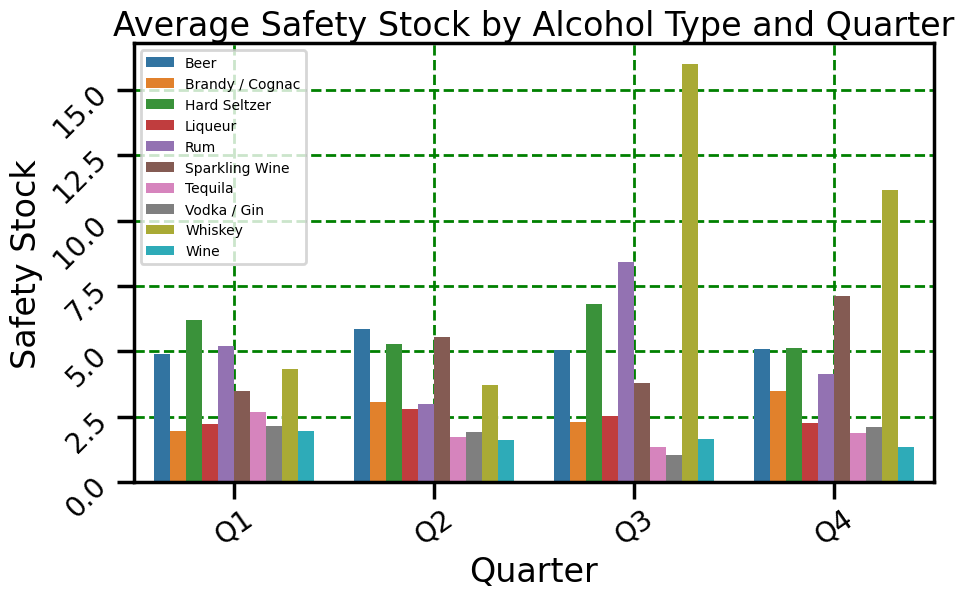

In [31]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Quarter', y = 'Safety Stock', data = weekly_stats, hue = 'Alcohol Type' )
sns.set_context("poster")
plt.tight_layout()
plt.legend(loc = 'upper left', fontsize = 10)
plt.title("Average Safety Stock by Alcohol Type and Quarter")
plt.grid(linestyle = "--", color = "green")
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks(rotation = 45, fontsize = 20)
plt.gca().set_axisbelow(True)
plt.show()

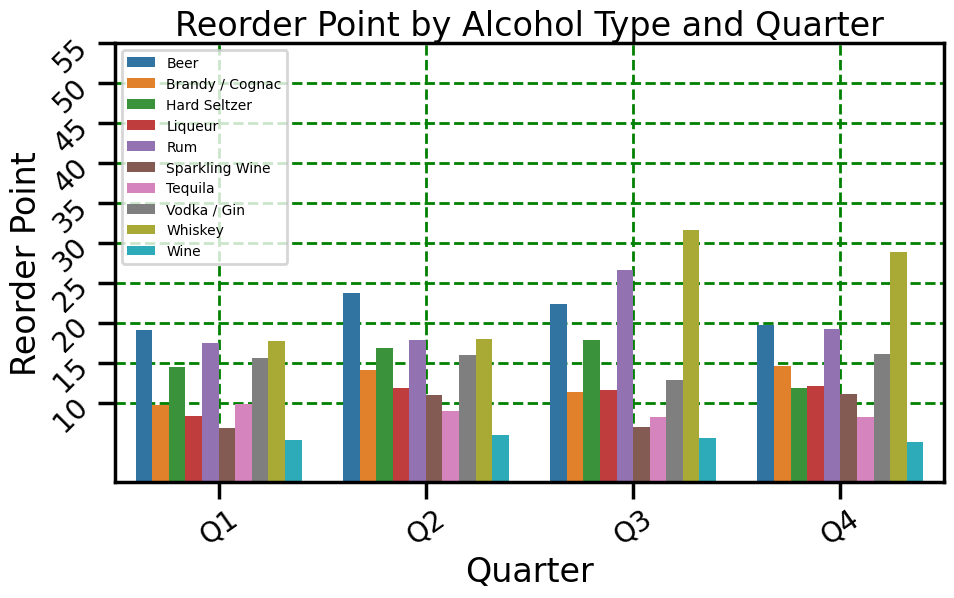

In [32]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Quarter', y = 'Reorder Point', data = weekly_stats, hue = 'Alcohol Type' )
sns.set_context("poster")
plt.tight_layout()
plt.legend(loc = 'upper left', fontsize = 10)
plt.title("Reorder Point by Alcohol Type and Quarter")
plt.grid(linestyle = "--", color = "green")
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks(range(10,60,5), rotation = 45, fontsize = 20)
plt.gca().set_axisbelow(True)
plt.show()